# Association with outcomes
Analysis was carried out at the pathologic case level.

In [1]:
# Libraries
suppressPackageStartupMessages(library(tidyverse))
library(broom)
library(survival)
suppressPackageStartupMessages(library(survminer))

# Global
options(warn = -1)

# Scripts
source("summarize.R")

# Data
load("DF.Rdata")

glimpse(DF)

Observations: 411
Variables: 23
$ registry_id            <dbl> 20060035601, 19970063502, 20040008703, 2007008…
$ pt_stage               <fct> T1, T1, T2, T1, T1, T1, Tis, T1, T2, Ta, Ta, T…
$ sp_id                  <chr> "06-S-4802", "07-S-3788", "07-S-8931", "07-S-6…
$ ck56                   <dbl> 60, 10, 90, NA, NA, 5, NA, 0, 0, 40, NA, 40, 4…
$ ck20                   <dbl> 0, 0, 0, NA, 0, 70, NA, 80, 0, 0, NA, 0, 10, N…
$ cd44                   <dbl> 70, 60, NA, NA, NA, 40, NA, 5, NA, 60, NA, NA,…
$ gata3                  <dbl> 100, 100, 100, NA, 100, 100, NA, 100, 100, 100…
$ er                     <dbl> 40, 20, NA, NA, 0, 0, 0, 0, 0, 5, NA, NA, 0, N…
$ her2                   <dbl> 0, 5, NA, NA, 60, 30, NA, 40, 60, 60, NA, 30, …
$ uroplakin              <dbl> 5, 20, NA, NA, NA, 0, NA, 10, NA, 0, NA, NA, 0…
$ sex                    <fct> Male, Male, Male, Male, Male, Male, Female, Ma…
$ death                  <fct> Dead, Alive, Dead, Alive, Alive, Alive, Alive,…
$ progression_stage_

In [2]:
# A function to define which statistics (v.g., median, max value) will be used for summarizing biomarkers expression
# If needed, changing this function will update the approach for the entire analysis
summarize_biomarker <- function(x) { mean(x, na.rm = TRUE) }

# Tidying up the data and summarizing expression
OUTCOME <- DF %>% 
    group_by(sp_id) %>% 
    summarize(
        ck56 = summarize_biomarker(ck56),
        cd44 = summarize_biomarker(cd44),
        ck20 = summarize_biomarker(ck20),
        er = summarize_biomarker(er),
        her2 = summarize_biomarker(her2),
        gata3 = summarize_biomarker(gata3),
        uroplakin = summarize_biomarker(uroplakin),
        pt_stage = unique(pt_stage),
        fu_mo = unique(fu_mo),
        recurrence_next = unique(recurrence_next),
        recurrence_any = unique(recurrence_any),
        progression_grade_next = unique(progression_grade_next),
        progression_grade_any = unique(progression_grade_any),
        progression_stage_next = unique(progression_stage_next),
        progression_stage_any = unique(progression_stage_any)
    ) %>% 
    mutate(
        pt = ifelse(
          pt_stage == "Tis" | pt_stage == "Ta",
          "Low pT stage (<pT1)", "High pT stage (pT1-pT2)"
        ),
        pt = fct_relevel(pt, "Low pT stage (<pT1)"),
        ck56_level = ifelse(
          ck56 > summarize_biomarker(ck56),
          "High CK5/6 expression", "Low CK5/6 expression"
        ),
        ck56_level = fct_relevel(ck56_level, "Low CK5/6 expression"),
        cd44_level = ifelse(
          cd44 > summarize_biomarker(cd44),
          "High CD44 expression", "Low CD44 expression"
        ),
        cd44_level = fct_relevel(cd44_level, "Low CD44 expression"),
        ck20_level = ifelse(
          ck20 > summarize_biomarker(ck20),
          "High CK20 expression", "Low CK20 expression"
        ),
        ck20_level = fct_relevel(ck20_level, "Low CK20 expression"),
        er_level = ifelse(
          er > summarize_biomarker(er),
          "High ER expression", "Low ER expression"
        ),
        er_level = fct_relevel(er_level, "Low CK20 expression"),
        her2_level = ifelse(
          her2 > summarize_biomarker(her2),
          "High HER2 expression", "Low HER2 expression"
        ),
        her2_level = fct_relevel(her2_level, "Low HER2 expression"),
        gata3_level = ifelse(
          gata3 > summarize_biomarker(gata3),
          "High GATA3 expression", "Low GATA3 expression"
        ),
        gata3_level = fct_relevel(gata3_level, "Low GATA3 expression"),
        uroplakin_level = ifelse(
          uroplakin > summarize_biomarker(uroplakin),
          "High Uroplakin expression", "Low Uroplakin expression"
        ),
        uroplakin_level = fct_relevel(uroplakin_level, "Low Uroplakin expression")
    )

glimpse(OUTCOME)

Observations: 128
Variables: 24
$ sp_id                  <chr> "01-S-10015", "01-S-7500", "01-S-9347", "02-S-…
$ ck56                   <dbl> 5.000000, 3.333333, 10.000000, 11.000000, 15.0…
$ cd44                   <dbl> 30.000000, 15.000000, 43.333333, 26.000000, 38…
$ ck20                   <dbl> 10.000000, 23.333333, 30.000000, 25.000000, 76…
$ er                     <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.…
$ her2                   <dbl> 36.666667, 0.000000, 18.333333, 1.666667, 50.0…
$ gata3                  <dbl> 100.00000, 100.00000, 100.00000, 100.00000, 10…
$ uroplakin              <dbl> 0.0000000, 0.0000000, 6.6666667, 6.6666667, 21…
$ pt_stage               <fct> Ta, Ta, Ta, T1, T1, T1, T1, T1, Ta, T1, Ta, Ta…
$ fu_mo                  <dbl> 85.2, 4.5, 85.2, 57.9, 57.9, 31.3, 31.3, 3.9, …
$ recurrence_next        <fct> No tumor recurrence, Tumor recurrence, Tumor r…
$ recurrence_any         <fct> Tumor recurrence, Tumor recurrence, Tumor recu…
$ progression_grade_

## CK5/6

In [3]:
OUTCOME <- OUTCOME %>% 
  mutate(biomarker = ck56)

### pT stage

In [4]:
OUTCOME %>% summarize_nums(biomarker, pt)

# A tibble: 3 x 9
  Levels                      N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                   <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Low pT stage (<pT1)        83  32.5 25.0      30  39.6     0   100       8
2 High pT stage (pT1-pT2)    39  22.8 24.6      11  24.6     0    90       0
3 <NA>                        6  68.3  7.64     70   7.5    60    75       3

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 1841, p-value = 0.02384
alternative hypothesis: true location shift is not equal to 0



### Tumor recurrence at next biopsy

In [5]:
OUTCOME %>% summarize_nums(biomarker, recurrence_next)

# A tibble: 3 x 9
  Levels                  N  Mean    SD Median   IQR   Min   Max Missing
  <fct>               <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Tumor recurrence       67  28.3  26.2   17.1  37.9     0    90       5
2 No tumor recurrence    44  34.5  26.5   30    42.5     0   100       4
3 <NA>                   17  26.4  20.8   20    24.8     0    70       2

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 1065, p-value = 0.2313
alternative hypothesis: true location shift is not equal to 0



### Tumor recurrence at any biopsy

In [6]:
OUTCOME %>% summarize_nums(biomarker, recurrence_any)

# A tibble: 2 x 9
  Levels                  N  Mean    SD Median   IQR   Min   Max Missing
  <fct>               <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Tumor recurrence      118  29.7  25.8   20    38.3  0      100      11
2 No tumor recurrence    10  34.9  24.9   28.3  35.8  4.17    75       0

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 438.5, p-value = 0.3489
alternative hypothesis: true location shift is not equal to 0



### Tumor grade progression at next biopsy

In [7]:
OUTCOME %>% summarize_nums(biomarker, progression_grade_next)

# A tibble: 3 x 9
  Levels                   N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Grade progression        5  32.5  28.0     20  47.5     5    65       0
2 No grade progression   110  30.0  26.2     20  38.3     0   100       9
3 <NA>                    13  30.5  21.8     30  23.2     5    70       2

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 275.5, p-value = 0.7372
alternative hypothesis: true location shift is not equal to 0



### Tumor grade progression at any biopsy

In [8]:
OUTCOME %>% summarize_nums(biomarker, progression_grade_any)

# A tibble: 2 x 9
  Levels                   N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Grade progression       13  29.9  22.1     25  28.1     0    65       1
2 No grade progression   115  30.2  26.1     20  38.3     0   100      10

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 658.5, p-value = 0.8012
alternative hypothesis: true location shift is not equal to 0



### Tumor stage progression at next biopsy

In [9]:
OUTCOME %>% summarize_nums(biomarker, progression_stage_next)

# A tibble: 3 x 9
  Levels                   N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Stage progression        5  66.2  35.4     78  22       5    90       0
2 No stage progression   106  29.5  24.8     20  36.7     0   100       9
3 <NA>                    17  22.5  18.3     20  23.3     0    70       2

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 387.5, p-value = 0.02501
alternative hypothesis: true location shift is not equal to 0



### Tumor stage progression at any biopsy

In [10]:
OUTCOME %>% summarize_nums(biomarker, progression_stage_any)

# A tibble: 2 x 9
  Levels                   N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Stage progression       16  36.6  34.6   13.5  60.8     0    90       0
2 No stage progression   112  29.2  24.0   20    38.3     0   100      11

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 875, p-value = 0.5975
alternative hypothesis: true location shift is not equal to 0



## CD44

In [11]:
OUTCOME <- OUTCOME %>% 
  mutate(biomarker = cd44)

### pT stage

In [12]:
OUTCOME %>% summarize_nums(biomarker, pt)

# A tibble: 3 x 9
  Levels                      N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                   <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Low pT stage (<pT1)        83  54.2  29.8     60  50       0 100        11
2 High pT stage (pT1-pT2)    39  40.7  26.6     42  41.3     0  91.7       2
3 <NA>                        6  66    32.7     80  20      10  90         1

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 1693, p-value = 0.02097
alternative hypothesis: true location shift is not equal to 0



### Tumor recurrence at next biopsy

In [13]:
OUTCOME %>% summarize_nums(biomarker, recurrence_next)

# A tibble: 3 x 9
  Levels                  N  Mean    SD Median   IQR   Min   Max Missing
  <fct>               <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Tumor recurrence       67  46.6  29.8   45.8  50.6     0   100       7
2 No tumor recurrence    44  57.5  29.8   65    45       0   100       5
3 <NA>                   17  46.6  25.5   45    40       5    90       2

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 913, p-value = 0.06606
alternative hypothesis: true location shift is not equal to 0



### Tumor recurrence at any biopsy

In [14]:
OUTCOME %>% summarize_nums(biomarker, recurrence_any)

# A tibble: 2 x 9
  Levels                  N  Mean    SD Median   IQR   Min   Max Missing
  <fct>               <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Tumor recurrence      118  49.6  29.7     50  50.8   0   100        14
2 No tumor recurrence    10  58.2  28.3     65  25.4   7.5  91.7       0

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 428, p-value = 0.359
alternative hypothesis: true location shift is not equal to 0



### Tumor grade progression at next biopsy

In [15]:
OUTCOME %>% summarize_nums(biomarker, progression_grade_next)

# A tibble: 3 x 9
  Levels                   N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Grade progression        5  40    43.6   20    40      10    90       2
2 No grade progression   110  51.0  29.7   50.4  51.0     0   100      10
3 <NA>                    13  47.1  26.4   55    40       5    90       2

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 124, p-value = 0.6168
alternative hypothesis: true location shift is not equal to 0



### Tumor grade progression at any biopsy

In [16]:
OUTCOME %>% summarize_nums(biomarker, progression_grade_any)

# A tibble: 2 x 9
  Levels                   N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Grade progression       13  56    35.1     70  68.8    10    90       3
2 No grade progression   115  49.8  29.1     50  49.4     0   100      11

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 595, p-value = 0.4552
alternative hypothesis: true location shift is not equal to 0



### Tumor stage progression at next biopsy

In [17]:
OUTCOME %>% summarize_nums(biomarker, progression_stage_next)

# A tibble: 3 x 9
  Levels                   N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Stage progression        5  40.7  26.5   40    40      10  73.3       0
2 No stage progression   106  51.6  30.2   52.1  51.5     0 100        12
3 <NA>                    17  45.6  26.9   45    40.8     5  90         2

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 181.5, p-value = 0.3967
alternative hypothesis: true location shift is not equal to 0



### Tumor stage progression at any biopsy

In [18]:
OUTCOME %>% summarize_nums(biomarker, progression_stage_any)

# A tibble: 2 x 9
  Levels                   N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Stage progression       16  36.3  21.2   38.3  34.6     5  73.3       1
2 No stage progression   112  52.4  30.1   58    50.4     0 100        13

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 502.5, p-value = 0.04452
alternative hypothesis: true location shift is not equal to 0



## CK20

In [19]:
OUTCOME <- OUTCOME %>% 
  mutate(biomarker = ck20)

### pT stage

In [20]:
OUTCOME %>% summarize_nums(biomarker, pt)

# A tibble: 3 x 9
  Levels                      N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                   <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Low pT stage (<pT1)        83 26.8  29.6    17.5  43.3     0   100       8
2 High pT stage (pT1-pT2)    39 35.2  33.9    24.5  57.5     0   100       1
3 <NA>                        6  6.67  7.64    5     7.5     0    15       3

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 1221.5, p-value = 0.2119
alternative hypothesis: true location shift is not equal to 0



### Tumor recurrence at next biopsy

In [21]:
OUTCOME %>% summarize_nums(biomarker, recurrence_next)

# A tibble: 3 x 9
  Levels                  N  Mean    SD Median   IQR   Min   Max Missing
  <fct>               <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Tumor recurrence       67  28.1  29.3   21.7  43.3     0    96       6
2 No tumor recurrence    44  25.9  31.7   10    50.6     0   100       4
3 <NA>                   17  41.2  35.3   38.3  62.5     0   100       2

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 1352, p-value = 0.3547
alternative hypothesis: true location shift is not equal to 0



### Tumor recurrence at any biopsy

In [22]:
OUTCOME %>% summarize_nums(biomarker, recurrence_any)

# A tibble: 2 x 9
  Levels                  N  Mean    SD Median   IQR   Min   Max Missing
  <fct>               <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Tumor recurrence      118  29.7  31.3   20.8  51.5     0 100        12
2 No tumor recurrence    10  21.6  28.0   10    29.8     0  83.3       0

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 594, p-value = 0.5273
alternative hypothesis: true location shift is not equal to 0



### Tumor grade progression at next biopsy

In [23]:
OUTCOME %>% summarize_nums(biomarker, progression_grade_next)

# A tibble: 3 x 9
  Levels                   N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Grade progression        5  33.3  33.1   31.7  45       0    80       0
2 No grade progression   110  28.0  31.0   17.8  50       0   100      10
3 <NA>                    13  36.3  32.4   30    62.5     0    80       2

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 282, p-value = 0.631
alternative hypothesis: true location shift is not equal to 0



### Tumor grade progression at any biopsy

In [24]:
OUTCOME %>% summarize_nums(biomarker, progression_grade_any)

# A tibble: 2 x 9
  Levels                   N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Grade progression       13  31.4  37.2     20    50     0   100       1
2 No grade progression   115  28.7  30.4     19    52     0    96      11

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 628.5, p-value = 0.9707
alternative hypothesis: true location shift is not equal to 0



### Tumor stage progression at next biopsy

In [25]:
OUTCOME %>% summarize_nums(biomarker, progression_stage_next)

# A tibble: 3 x 9
  Levels                   N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Stage progression        5  23    20.7   21    17       0    50       1
2 No stage progression   106  27.5  30.4   16.7  50       0   100       9
3 <NA>                    17  40.4  36.1   38.3  67.5     0   100       2

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 193.5, p-value = 1
alternative hypothesis: true location shift is not equal to 0



### Tumor stage progression at any biopsy

In [26]:
OUTCOME %>% summarize_nums(biomarker, progression_stage_any)

# A tibble: 2 x 9
  Levels                   N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Stage progression       16  24.7  31.3   15.8  37.5     0   100       1
2 No stage progression   112  29.6  31.1   21.7  52       0   100      11

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 683, p-value = 0.5378
alternative hypothesis: true location shift is not equal to 0



## ER

In [27]:
OUTCOME <- OUTCOME %>% 
  mutate(biomarker = er)

### pT stage

In [28]:
OUTCOME %>% summarize_nums(biomarker, pt)

# A tibble: 3 x 9
  Levels                      N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                   <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Low pT stage (<pT1)        83 0.855  3.02   0     0        0  20         7
2 High pT stage (pT1-pT2)    39 2.16   6.43   0     0        0  28.3       1
3 <NA>                        6 2.5    3.54   1.25  3.75     0   7.5       2

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 1308, p-value = 0.2191
alternative hypothesis: true location shift is not equal to 0



### Tumor recurrence at next biopsy

In [29]:
OUTCOME %>% summarize_nums(biomarker, recurrence_next)

# A tibble: 3 x 9
  Levels                  N  Mean    SD Median   IQR   Min   Max Missing
  <fct>               <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Tumor recurrence       67  1.20  4.03      0     0     0  26         4
2 No tumor recurrence    44  1.27  4.66      0     0     0  28.3       4
3 <NA>                   17  2.06  5.59      0     0     0  20         2

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 1271, p-value = 0.9163
alternative hypothesis: true location shift is not equal to 0



### Tumor recurrence at any biopsy

In [30]:
OUTCOME %>% summarize_nums(biomarker, recurrence_any)

# A tibble: 2 x 9
  Levels                  N  Mean    SD Median   IQR   Min   Max Missing
  <fct>               <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Tumor recurrence      118  1.09  3.78      0  0        0  26        10
2 No tumor recurrence    10  3.92  8.77      0  3.12     0  28.3       0

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 403, p-value = 0.05218
alternative hypothesis: true location shift is not equal to 0



### Tumor grade progression at next biopsy

In [31]:
OUTCOME %>% summarize_nums(biomarker, progression_grade_next)

# A tibble: 3 x 9
  Levels                   N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Grade progression        5 0      0         0     0     0   0         0
2 No grade progression   110 1.44   4.66      0     0     0  28.3       8
3 <NA>                    13 0.909  3.02      0     0     0  10         2

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 202.5, p-value = 0.2683
alternative hypothesis: true location shift is not equal to 0



### Tumor grade progression at any biopsy

In [32]:
OUTCOME %>% summarize_nums(biomarker, progression_grade_any)

# A tibble: 2 x 9
  Levels                   N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Grade progression       13  1.59  3.58      0     0     0  10         2
2 No grade progression   115  1.30  4.52      0     0     0  28.3       8

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 594.5, p-value = 0.9403
alternative hypothesis: true location shift is not equal to 0



### Tumor stage progression at next biopsy

In [33]:
OUTCOME %>% summarize_nums(biomarker, progression_stage_next)

# A tibble: 3 x 9
  Levels                   N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Stage progression        5  0     0         0 0         0   0         0
2 No stage progression   106  1.15  4.18      0 0         0  28.3       8
3 <NA>                    17  2.94  6.26      0 0.417     0  20         2

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 200, p-value = 0.3021
alternative hypothesis: true location shift is not equal to 0



### Tumor stage progression at any biopsy

In [34]:
OUTCOME %>% summarize_nums(biomarker, progression_stage_any)

# A tibble: 2 x 9
  Levels                   N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Stage progression       16  2.62  7.32      0     0     0  26         1
2 No stage progression   112  1.14  3.86      0     0     0  28.3       9

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 742.5, p-value = 0.7257
alternative hypothesis: true location shift is not equal to 0



## HER2

In [35]:
OUTCOME <- OUTCOME %>% 
  mutate(biomarker = her2)

### pT stage

In [36]:
OUTCOME %>% summarize_nums(biomarker, pt)

# A tibble: 3 x 9
  Levels                      N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                   <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Low pT stage (<pT1)        83  38.1  31.2  35     55       0   100       9
2 High pT stage (pT1-pT2)    39  50.7  30.3  50     51.3     0   100       0
3 <NA>                        6  10.6  16.4   3.75  10.6     0    35       2

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 1094.5, p-value = 0.03538
alternative hypothesis: true location shift is not equal to 0



### Tumor recurrence at next biopsy

In [37]:
OUTCOME %>% summarize_nums(biomarker, recurrence_next)

# A tibble: 3 x 9
  Levels                  N  Mean    SD Median   IQR   Min   Max Missing
  <fct>               <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Tumor recurrence       67  43.1  28.9   40    45       0  96.7       6
2 No tumor recurrence    44  37.8  33.1   31.7  58.3     0 100         3
3 <NA>                   17  44.1  37.5   40    61.7     0 100         2

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 1390, p-value = 0.3423
alternative hypothesis: true location shift is not equal to 0



### Tumor recurrence at any biopsy

In [38]:
OUTCOME %>% summarize_nums(biomarker, recurrence_any)

# A tibble: 2 x 9
  Levels                  N  Mean    SD Median   IQR   Min   Max Missing
  <fct>               <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Tumor recurrence      118  43.1  30.7  40     49.2     0   100      11
2 No tumor recurrence    10  22.3  34.9   6.25  16.9     0    90       0

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 758.5, p-value = 0.02952
alternative hypothesis: true location shift is not equal to 0



### Tumor grade progression at next biopsy

In [39]:
OUTCOME %>% summarize_nums(biomarker, progression_grade_next)

# A tibble: 3 x 9
  Levels                   N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Grade progression        5  60.2  33.7     70  11.7   2.5    90       0
2 No grade progression   110  39.5  30.9     35  48.3   0     100       9
3 <NA>                    13  49.8  33.7     40  52.7   0     100       2

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 349, p-value = 0.152
alternative hypothesis: true location shift is not equal to 0



### Tumor grade progression at any biopsy

In [40]:
OUTCOME %>% summarize_nums(biomarker, progression_grade_any)

# A tibble: 2 x 9
  Levels                   N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Grade progression       13  57.8  28.7   64.2  36.2   2.5   100       1
2 No grade progression   115  39.5  31.3   35    50     0     100      10

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 851.5, p-value = 0.04684
alternative hypothesis: true location shift is not equal to 0



### Tumor stage progression at next biopsy

In [41]:
OUTCOME %>% summarize_nums(biomarker, progression_stage_next)

# A tibble: 3 x 9
  Levels                   N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Stage progression        5  43.6  28.2     44  21.2     0    75       0
2 No stage progression   106  40.0  30.9     35  49.3     0   100       9
3 <NA>                    17  49.4  36.5     40  62.5     0   100       2

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 263.5, p-value = 0.7504
alternative hypothesis: true location shift is not equal to 0



### Tumor stage progression at any biopsy

In [42]:
OUTCOME %>% summarize_nums(biomarker, progression_stage_any)

# A tibble: 2 x 9
  Levels                   N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Stage progression       16  47.6  31.2   47    54.4     0   100       0
2 No stage progression   112  40.4  31.5   36.7  50       0   100      11

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 920, p-value = 0.3759
alternative hypothesis: true location shift is not equal to 0



## GATA3

In [43]:
OUTCOME <- OUTCOME %>% 
  mutate(biomarker = gata3)

### pT stage

In [44]:
OUTCOME %>% summarize_nums(biomarker, pt)

# A tibble: 3 x 9
  Levels                      N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                   <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Low pT stage (<pT1)        83  99.4  4.27    100     0  63.3   100       8
2 High pT stage (pT1-pT2)    39  98.8  3.81    100     0  80     100       1
3 <NA>                        6 100    0       100     0 100     100       2

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 1538.5, p-value = 0.1435
alternative hypothesis: true location shift is not equal to 0



### Tumor recurrence at next biopsy

In [45]:
OUTCOME %>% summarize_nums(biomarker, recurrence_next)

# A tibble: 3 x 9
  Levels                  N  Mean    SD Median   IQR   Min   Max Missing
  <fct>               <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Tumor recurrence       67  99.4 2.78     100     0  80     100       5
2 No tumor recurrence    44  98.7 6.00     100     0  63.3   100       4
3 <NA>                   17  99.9 0.430    100     0  98.3   100       2

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 1236.5, p-value = 0.9648
alternative hypothesis: true location shift is not equal to 0



### Tumor recurrence at any biopsy

In [46]:
OUTCOME %>% summarize_nums(biomarker, recurrence_any)

# A tibble: 2 x 9
  Levels                  N  Mean    SD Median   IQR   Min   Max Missing
  <fct>               <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Tumor recurrence      118  99.3  4.13    100     0  63.3   100      11
2 No tumor recurrence    10  99    3.16    100     0  90     100       0

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 550.5, p-value = 0.7516
alternative hypothesis: true location shift is not equal to 0



### Tumor grade progression at next biopsy

In [47]:
OUTCOME %>% summarize_nums(biomarker, progression_grade_next)

# A tibble: 3 x 9
  Levels                   N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Grade progression        5 100    0       100     0 100     100       0
2 No grade progression   110  99.1  4.34    100     0  63.3   100       9
3 <NA>                    13 100    0       100     0 100     100       2

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 275, p-value = 0.4977
alternative hypothesis: true location shift is not equal to 0



### Tumor grade progression at any biopsy

In [48]:
OUTCOME %>% summarize_nums(biomarker, progression_grade_any)

# A tibble: 2 x 9
  Levels                   N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Grade progression       13 100    0       100     0 100     100       2
2 No grade progression   115  99.2  4.24    100     0  63.3   100       9

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 632.5, p-value = 0.322
alternative hypothesis: true location shift is not equal to 0



### Tumor stage progression at next biopsy

In [49]:
OUTCOME %>% summarize_nums(biomarker, progression_stage_next)

# A tibble: 3 x 9
  Levels                   N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Stage progression        5  96   8.94     100     0  80     100       0
2 No stage progression   106  99.3 3.97     100     0  63.3   100       9
3 <NA>                    17  99.9 0.430    100     0  98.3   100       2

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 209, p-value = 0.2726
alternative hypothesis: true location shift is not equal to 0



### Tumor stage progression at any biopsy

In [50]:
OUTCOME %>% summarize_nums(biomarker, progression_stage_any)

# A tibble: 2 x 9
  Levels                   N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Stage progression       16  98.2  5.33    100     0  80     100       1
2 No stage progression   112  99.4  3.83    100     0  63.3   100      10

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 712, p-value = 0.3543
alternative hypothesis: true location shift is not equal to 0



## Uroplakin

In [51]:
OUTCOME <- OUTCOME %>% 
  mutate(biomarker = uroplakin)

### pT stage

In [52]:
OUTCOME %>% summarize_nums(biomarker, pt)

# A tibble: 3 x 9
  Levels                      N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                   <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Low pT stage (<pT1)        83 13.2  17.1    8.33  12.9     0    80       9
2 High pT stage (pT1-pT2)    39 22.3  28.9    8.75  22.5     0    95       2
3 <NA>                        6  6.25  6.61   5      7.5     0    15       2

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 1153.5, p-value = 0.1758
alternative hypothesis: true location shift is not equal to 0



### Tumor recurrence at next biopsy

In [53]:
OUTCOME %>% summarize_nums(biomarker, recurrence_next)

# A tibble: 3 x 9
  Levels                  N  Mean    SD Median   IQR   Min   Max Missing
  <fct>               <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Tumor recurrence       67 18.3  22.7    10    22.1     0    92       5
2 No tumor recurrence    44 14.6  23.5     7.5  14.2     0    95       5
3 <NA>                   17  8.48  5.74   10     6.5     0    20       3

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 1421.5, p-value = 0.1365
alternative hypothesis: true location shift is not equal to 0



### Tumor recurrence at any biopsy

In [54]:
OUTCOME %>% summarize_nums(biomarker, recurrence_any)

# A tibble: 2 x 9
  Levels                  N  Mean    SD Median   IQR   Min   Max Missing
  <fct>               <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Tumor recurrence      118  16.3  22.6   8.75  18.3     0    95      13
2 No tumor recurrence    10  11.2  10.3   7.92  12.5     0    30       0

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 533, p-value = 0.9403
alternative hypothesis: true location shift is not equal to 0



### Tumor grade progression at next biopsy

In [55]:
OUTCOME %>% summarize_nums(biomarker, progression_grade_next)

# A tibble: 3 x 9
  Levels                   N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Grade progression        5  24.3 23.4   16.7  30        5    60       0
2 No grade progression   110  16.1 22.6    8.33 18.3      0    95      10
3 <NA>                    13   9.2  6.33  10     6.75     0    20       3

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 330.5, p-value = 0.2257
alternative hypothesis: true location shift is not equal to 0



### Tumor grade progression at any biopsy

In [56]:
OUTCOME %>% summarize_nums(biomarker, progression_grade_any)

# A tibble: 2 x 9
  Levels                   N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Grade progression       13  12.6  14.6  10     10       0    45       2
2 No grade progression   115  16.2  22.4   8.33  18.3     0    95      11

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 566.5, p-value = 0.9618
alternative hypothesis: true location shift is not equal to 0



### Tumor stage progression at next biopsy

In [57]:
OUTCOME %>% summarize_nums(biomarker, progression_stage_next)

# A tibble: 3 x 9
  Levels                   N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Stage progression        5  13.1  14.6   8.75 18.3      0    35       0
2 No stage progression   106  16.7  23.2   8.33 18.3      0    95      10
3 <NA>                    17  11.2  11.3  10     7.38     0    45       3

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 242.5, p-value = 0.9749
alternative hypothesis: true location shift is not equal to 0



### Tumor stage progression at any biopsy

In [58]:
OUTCOME %>% summarize_nums(biomarker, progression_stage_any)

# A tibble: 2 x 9
  Levels                   N  Mean    SD Median   IQR   Min   Max Missing
  <fct>                <int> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>   <int>
1 Stage progression       16  12.9  13.9   7.5   19.2     0    45       1
2 No stage progression   112  16.3  22.7   8.54  15.2     0    95      12

	Wilcoxon rank sum test with continuity correction

data:  x by y
W = 754.5, p-value = 0.9733
alternative hypothesis: true location shift is not equal to 0



## Summary boxplots

In [59]:
library(RColorBrewer)
library(ggpubr)
ASSOCIATION <- OUTCOME %>% 
  gather(biomarker, expression, ck56:uroplakin, na.rm = TRUE) %>% 
  filter(biomarker != "gata3" & biomarker != "er") %>% 
  mutate(
    biomarker = fct_recode(
      biomarker,
      "CK5/6" = "ck56",
      "CD44" = "cd44",
      "CK20" = "ck20",
      "HER2" = "her2",
      "Uroplakin" = "uroplakin"
    )
  )
glimpse(ASSOCIATION)

Observations: 579
Variables: 19
$ sp_id                  <chr> "01-S-10015", "01-S-7500", "01-S-9347", "02-S-…
$ pt_stage               <fct> Ta, Ta, Ta, T1, T1, T1, T1, T1, Ta, T1, Ta, Ta…
$ fu_mo                  <dbl> 85.2, 4.5, 85.2, 57.9, 57.9, 31.3, 31.3, 3.9, …
$ recurrence_next        <fct> No tumor recurrence, Tumor recurrence, Tumor r…
$ recurrence_any         <fct> Tumor recurrence, Tumor recurrence, Tumor recu…
$ progression_grade_next <fct> No grade progression, No grade progression, No…
$ progression_grade_any  <fct> No grade progression, No grade progression, No…
$ progression_stage_next <fct> No stage progression, No stage progression, No…
$ progression_stage_any  <fct> No stage progression, No stage progression, No…
$ pt                     <fct> Low pT stage (<pT1), Low pT stage (<pT1), Low …
$ ck56_level             <fct> Low CK5/6 expression, Low CK5/6 expression, Lo…
$ cd44_level             <fct> Low CD44 expression, Low CD44 expression, Low …
$ ck20_level        

### Overall expression
**Overall marker expression.** Distribution of markers expression with percentage of positive tumor cells at each TMA spot in the y axis.

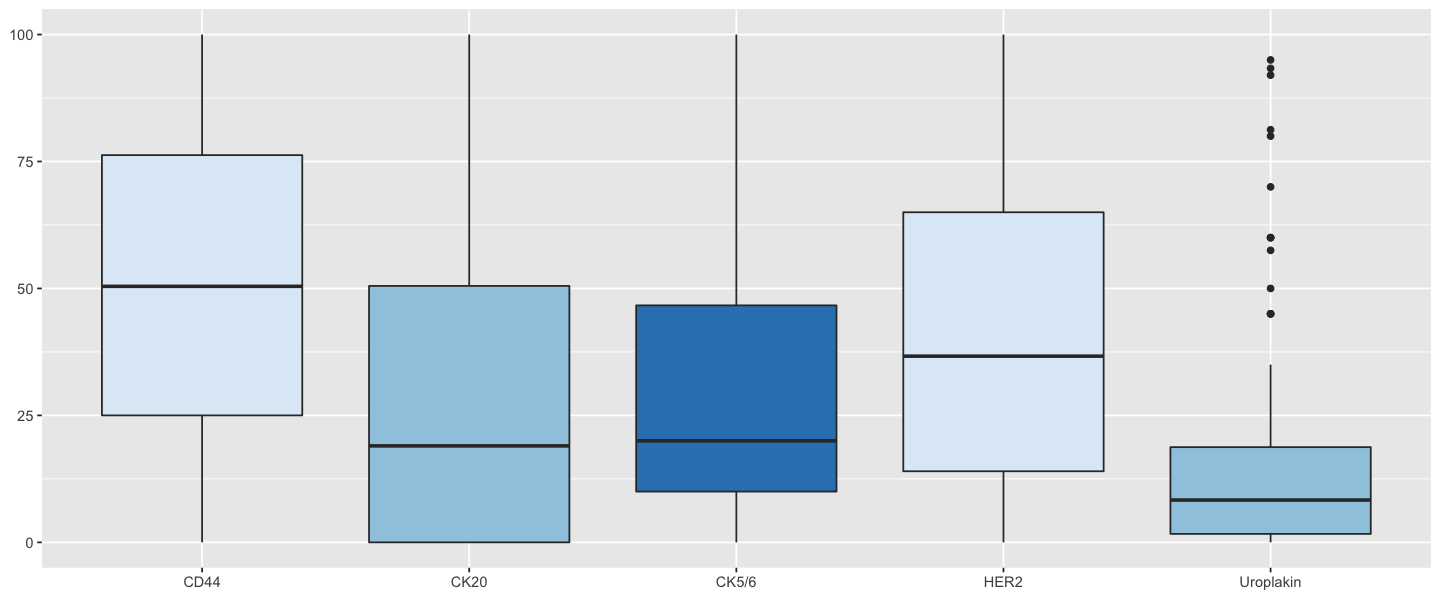

In [60]:
options(repr.plot.width = 12, repr.plot.height = 5)

Plot_A <- ggplot(ASSOCIATION, aes(x = biomarker, y = expression, fill = biomarker)) +
  geom_boxplot() +
  scale_fill_manual(values = rep(brewer.pal(3, "Blues"), times = 4)) +
  labs(
    x = NULL, y = NULL
  ) +
  theme(
    legend.position = "None"
  )

Plot_A

In [61]:
# Saving the plot
ggsave(
    filename = "Figs/BL-NMIBUC-Association-Overall.png",
    width = 12,
    height = 5,
    units = "in"
)

### Marker expression and outcome
**Markers expression and outcome.** A-F) Association of outcome and markers expression, with median percentage of positive tumor cells per case in the y axis. Lighter boxplots correspond to presence of the event (i.e., recurrence or progression) while darker boxplots correspond to absence of the event. Labels on top of the boxplots correspond to adjusted (Bonferroni's method) P values from Mann-Whitney's U tests.

In [62]:
## A function to plot boxplots of biomarkers expression by outcome
plot_association <- function(data, biomarker, expression, outcome) {
  
  # Data
  biomarker = enquo(biomarker)
  expression = enquo(expression)
  outcome = enquo(outcome)
  df <- data %>% 
    select(
      biomarker = !! biomarker,
      expression = !! expression,
      outcome = !! outcome
    )
  
  # Estimating (adjusted) P values
  pfig <- ggpubr::compare_means(
    expression ~ outcome,
    data = df,
    group.by = "biomarker",
    p.adjust.method = "bonferroni"
  ) %>% 
    select(p.adj) %>% 
    unlist() %>% 
    formatC(digits = 2, format = "fg", flag = "#")
  
  # Plotting
  g <- df %>% 
    filter(!is.na(outcome)) %>% 
    ggplot(aes(x = biomarker, y = expression, fill = outcome)) +
      geom_boxplot() +
      scale_fill_brewer(palette = "Blues") +
      labs(x = "", y = "") +
      theme(legend.position = "none") +
      annotate("label", label = paste0("P=", pfig), x = 1:5, y = 95)
  
  return(g)
}

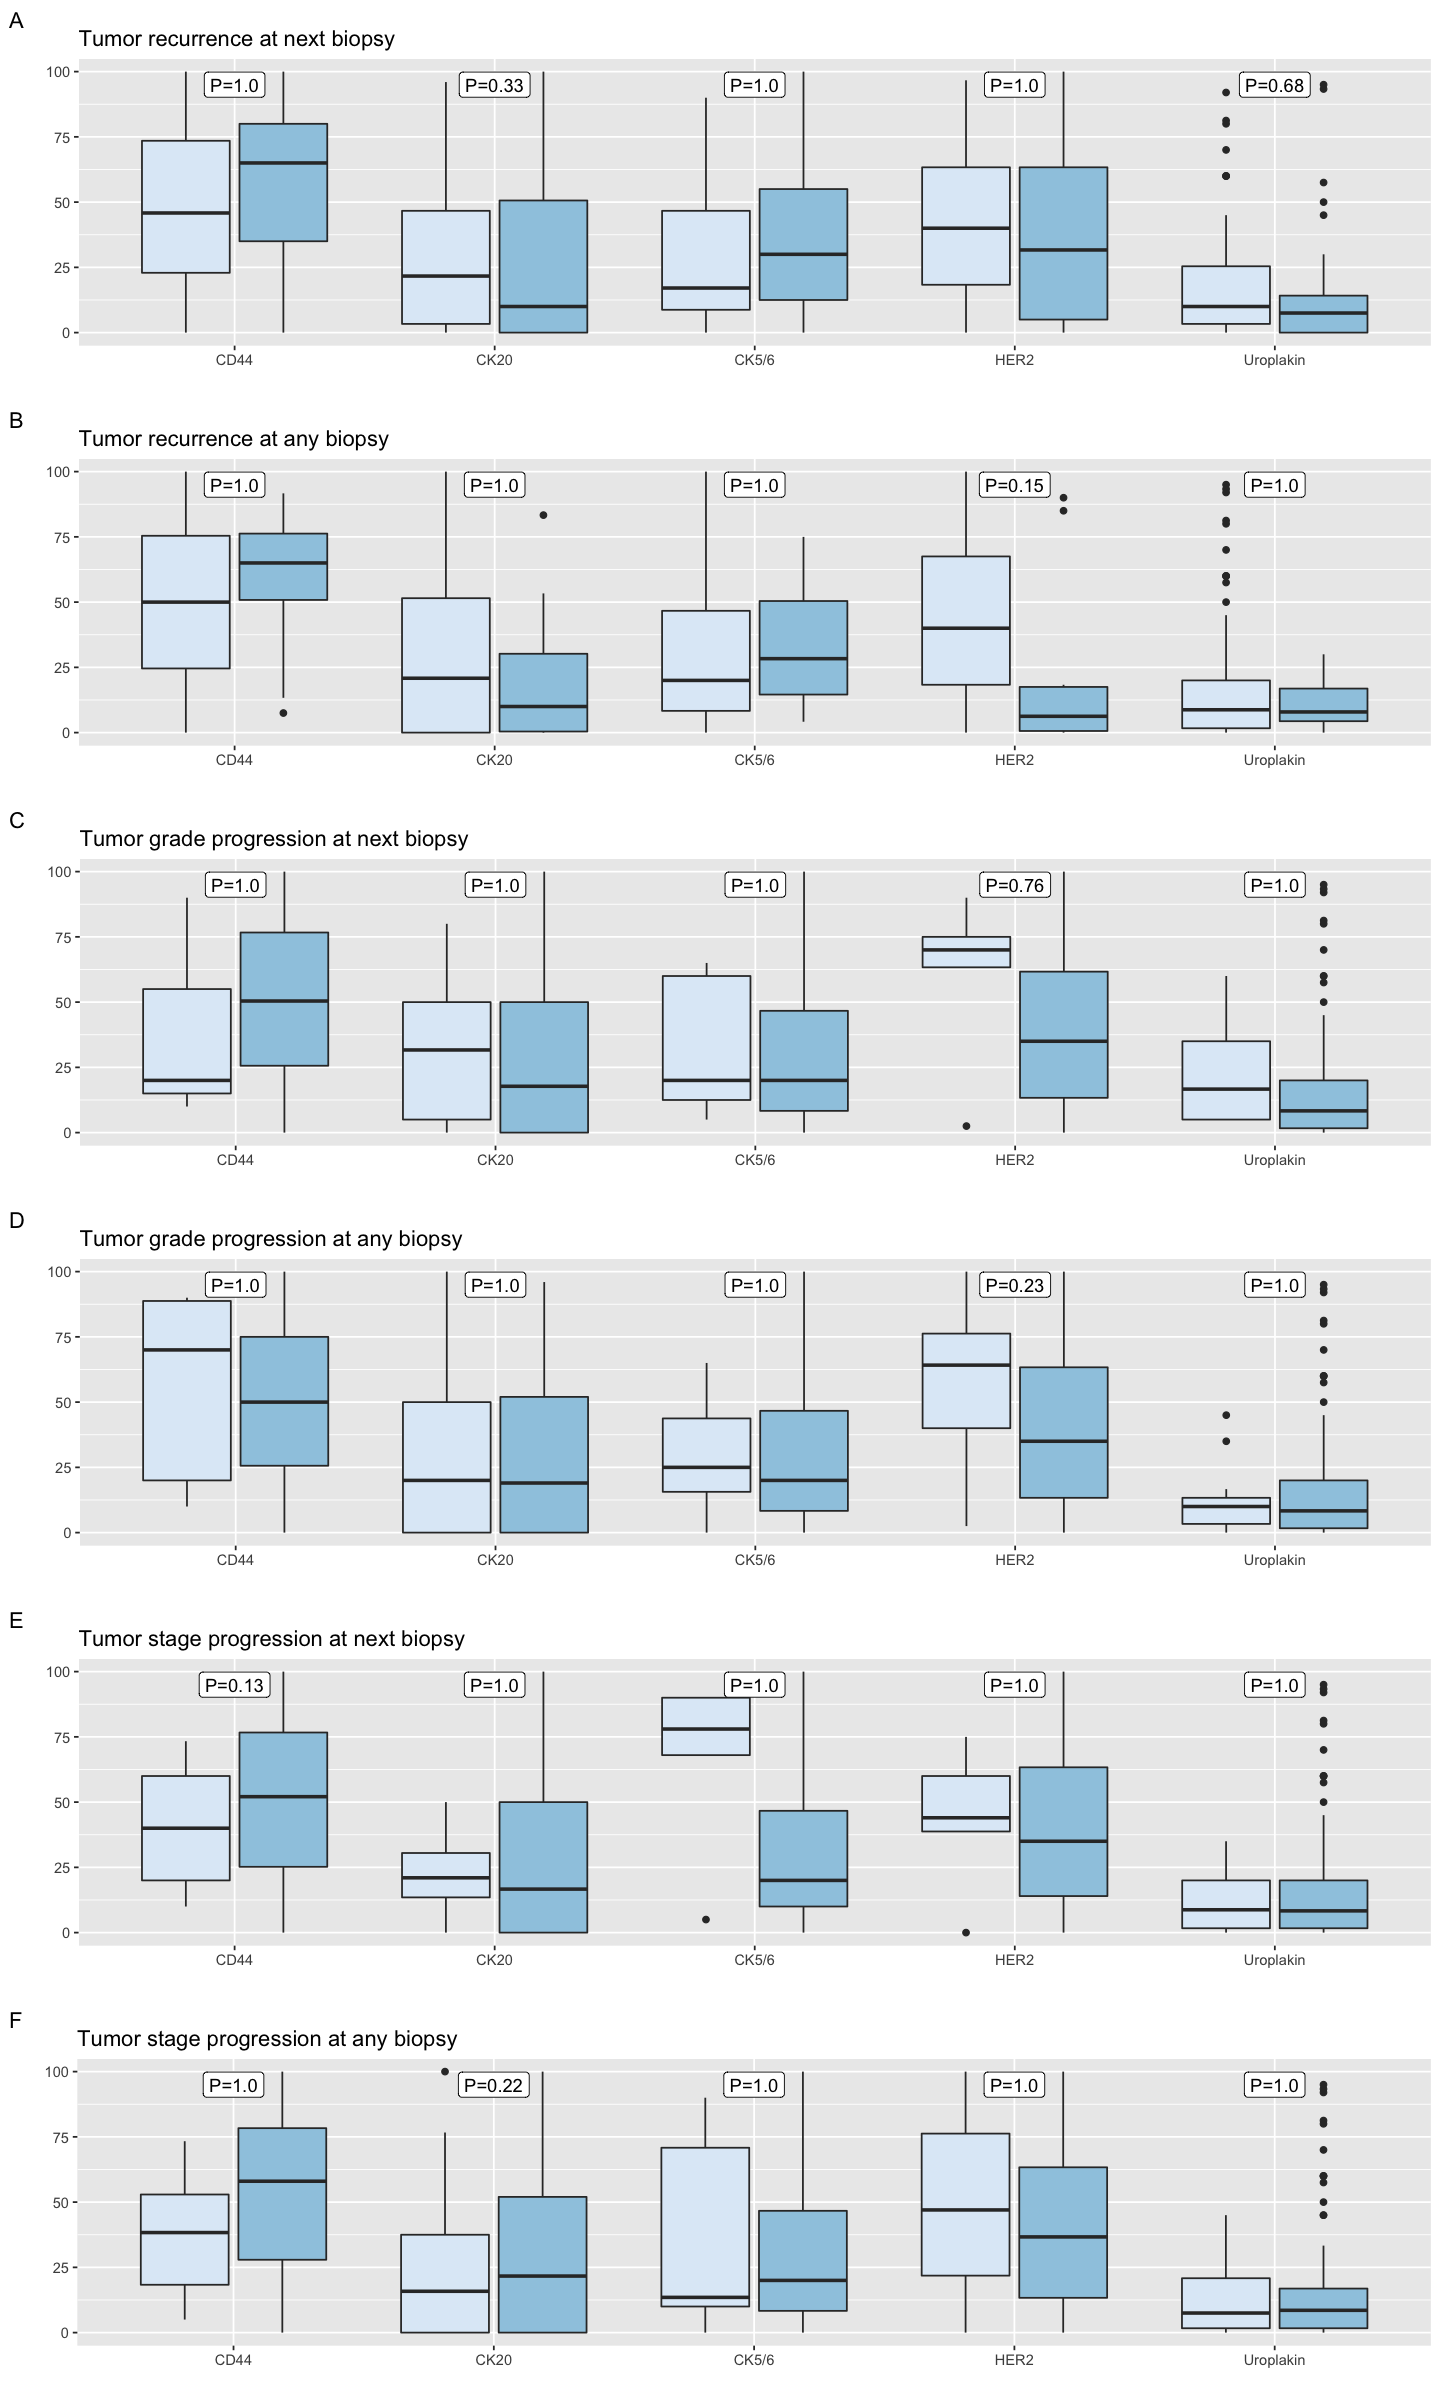

In [63]:
options(repr.plot.width = 12, repr.plot.height = 20)

Plot_B <- ASSOCIATION %>% plot_association(biomarker, expression, recurrence_next) +
  labs(title = "Tumor recurrence at next biopsy", tag = "A")
Plot_C <- ASSOCIATION %>% plot_association(biomarker, expression, recurrence_any) +
  labs(title = "Tumor recurrence at any biopsy", tag = "B")
Plot_D <- ASSOCIATION %>% plot_association(biomarker, expression, progression_grade_next) +
  labs(title = "Tumor grade progression at next biopsy", tag = "C")
Plot_E <- ASSOCIATION %>% plot_association(biomarker, expression, progression_grade_any) +
  labs(title = "Tumor grade progression at any biopsy", tag = "D")
Plot_F <- ASSOCIATION %>% plot_association(biomarker, expression, progression_stage_next) +
  labs(title = "Tumor stage progression at next biopsy", tag = "E")
Plot_G <- ASSOCIATION %>% plot_association(biomarker, expression, progression_stage_any) +
  labs(title = "Tumor stage progression at any biopsy", tag = "F")

Plot_Panel <- gridExtra::grid.arrange(
  Plot_B, Plot_C, Plot_D, Plot_E, Plot_F, Plot_G,
  ncol = 1
)

In [64]:
# Saving the plot
ggsave(
  filename = "Figs/BL-NMIBUC-Association-Outcome.png",
  plot = Plot_Panel,
  width = 12,
  height = 20,
  units = "in"
)

## Principal Component Analysis

In [65]:
# Creating the dataset for PCA
DF_PCA <- DF %>% 
  select(
    "CK5/6" = ck56,
    "CD44" = cd44,
    "CK20" = ck20,
    "HER2" = her2,
    "Uroplakin" = uroplakin,
    progression_stage_any:progression_grade_next
  ) %>% 
  drop_na()

# Building the PCA model
pca_mdl <- DF_PCA %>% 
  select("CK5/6":"Uroplakin") %>% 
  prcomp(center = TRUE, scale. = TRUE)

summary(pca_mdl)

Importance of components:
                          PC1    PC2    PC3    PC4    PC5
Standard deviation     1.3971 0.9795 0.8763 0.8421 0.7820
Proportion of Variance 0.3904 0.1919 0.1536 0.1418 0.1223
Cumulative Proportion  0.3904 0.5823 0.7359 0.8777 1.0000

In [66]:
# Reseting to default values the plot sizes
options(repr.plot.width = 7, repr.plot.height = 7)

# A function for biplots
pca_biplot <- function(data, group) {
  g <- factoextra::fviz_pca(
    data,
    col.ind = group,
    geom = "point",
    palette = c("steelblue", "darkgray"),
    addEllipses = TRUE,
    ellipse.alpha = 0.25,
    repel = TRUE,
    ggtheme = theme_grey()
  ) + theme(legend.position = "none")
  
  return(g)
}

### Tumor recurrence at next biopsy

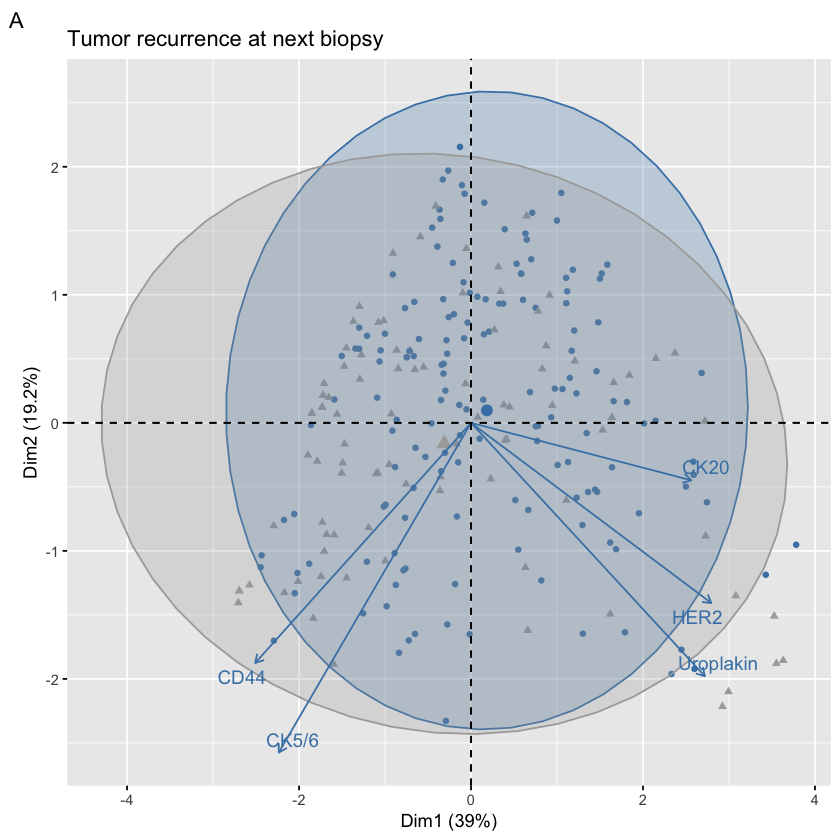

In [67]:
PCA_A <- pca_biplot(pca_mdl, DF_PCA$recurrence_next) +
  labs(title = "Tumor recurrence at next biopsy", tag = "A")

PCA_A

### Tumor recurrence at any biopsy

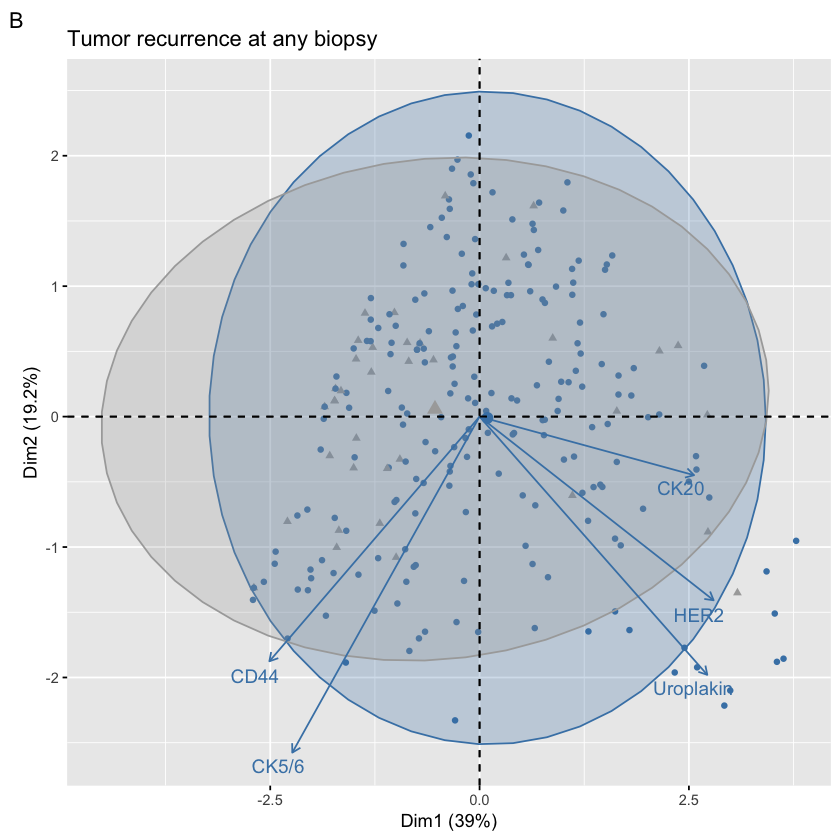

In [68]:
PCA_B <- pca_biplot(pca_mdl, DF_PCA$recurrence_any) +
  labs(title = "Tumor recurrence at any biopsy", tag = "B")

PCA_B

### Tumor grade progression at next biopsy

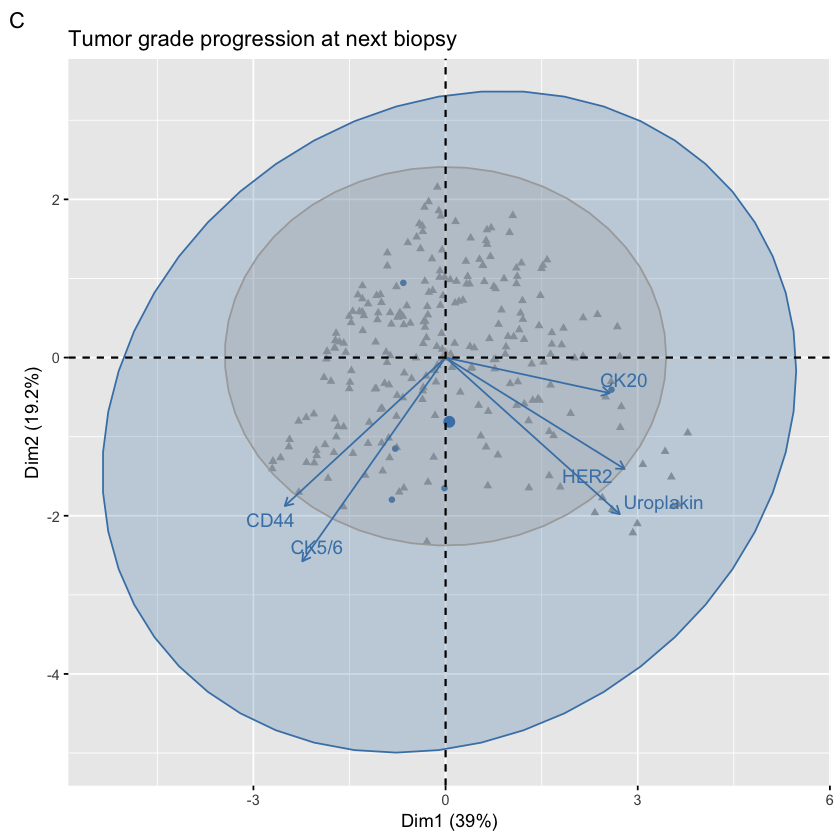

In [69]:
PCA_C <- pca_biplot(pca_mdl, DF_PCA$progression_grade_next) +
  labs(title = "Tumor grade progression at next biopsy", tag = "C")

PCA_C

### Tumor grade progression at any biopsy

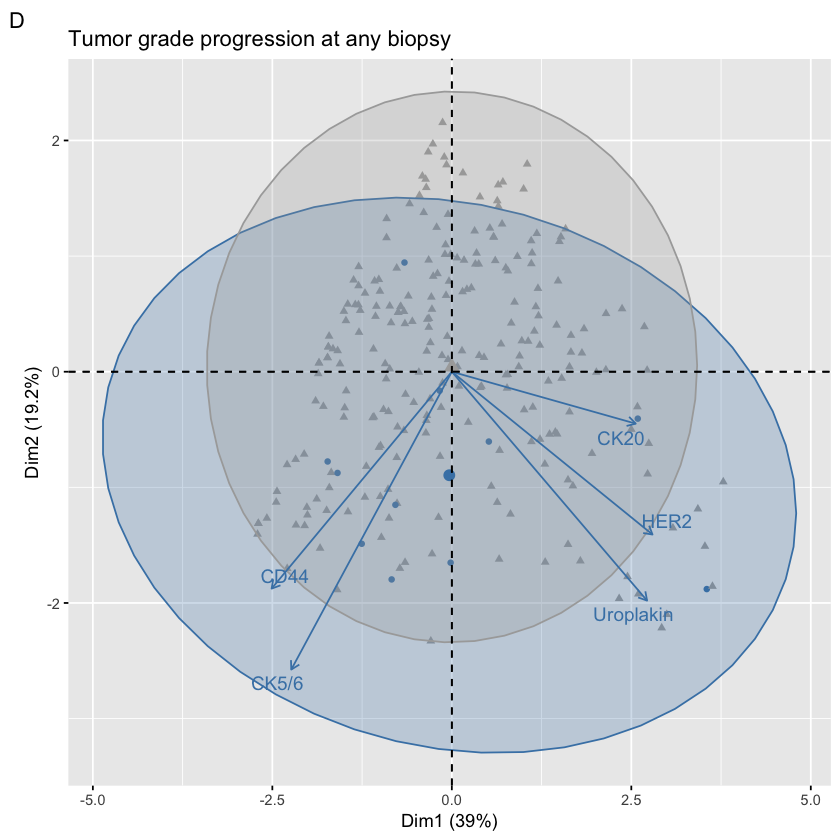

In [70]:
PCA_D <- pca_biplot(pca_mdl, DF_PCA$progression_grade_any) +
  labs(title = "Tumor grade progression at any biopsy", tag = "D")

PCA_D

### Tumor stage progression at next biopsy

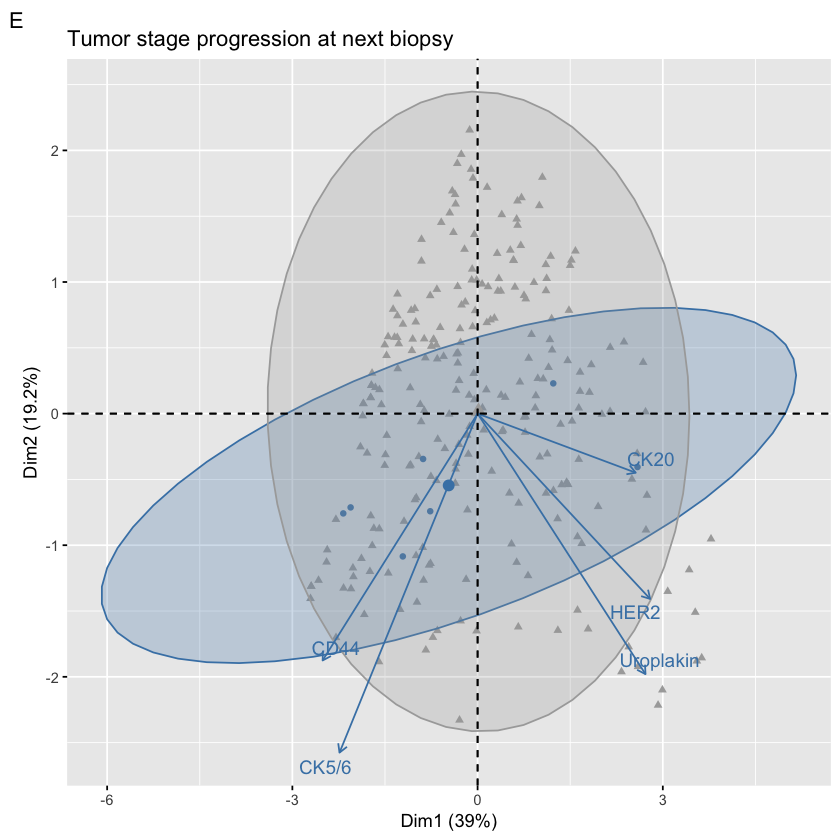

In [71]:
PCA_E <- pca_biplot(pca_mdl, DF_PCA$progression_stage_next) +
  labs(title = "Tumor stage progression at next biopsy", tag = "E")

PCA_E

### Tumor stage progression at any biopsy

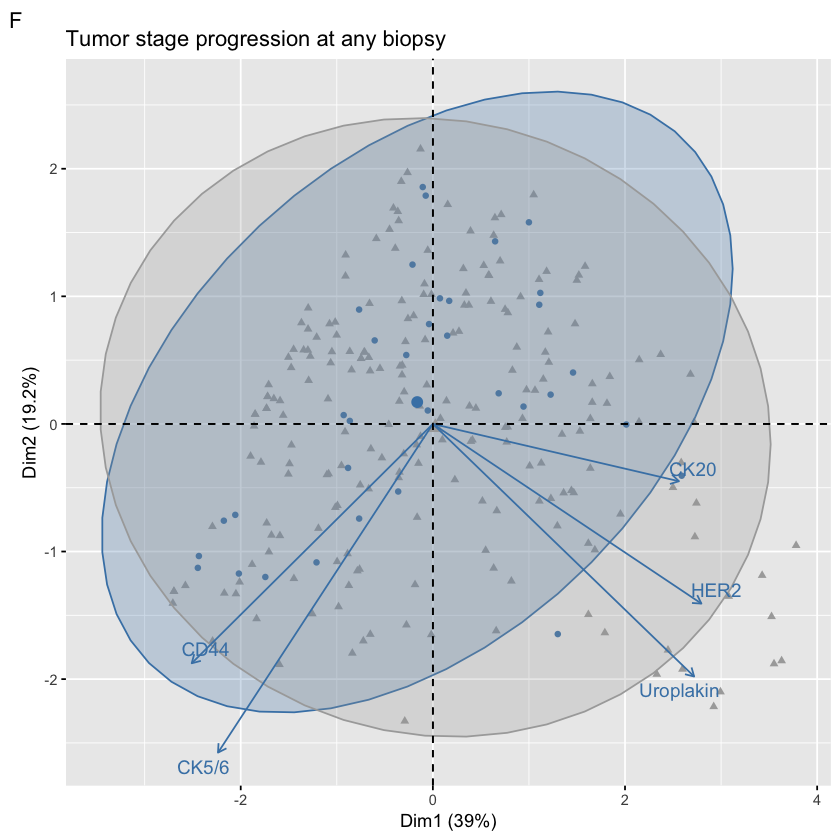

In [72]:
PCA_F <- pca_biplot(pca_mdl, DF_PCA$progression_stage_any) +
  labs(title = "Tumor stage progression at any biopsy", tag = "F")

PCA_F

### Combined plots
Principal component analysis of markers expression and outcome. Biplots of the first 2 principal components (PC1 and PC2) with superimposed ellipses by outcome. Blue ellipses correspond to presence of the event (i.e., recurrence or progression) while gray ellipses correspond to absence of the event.

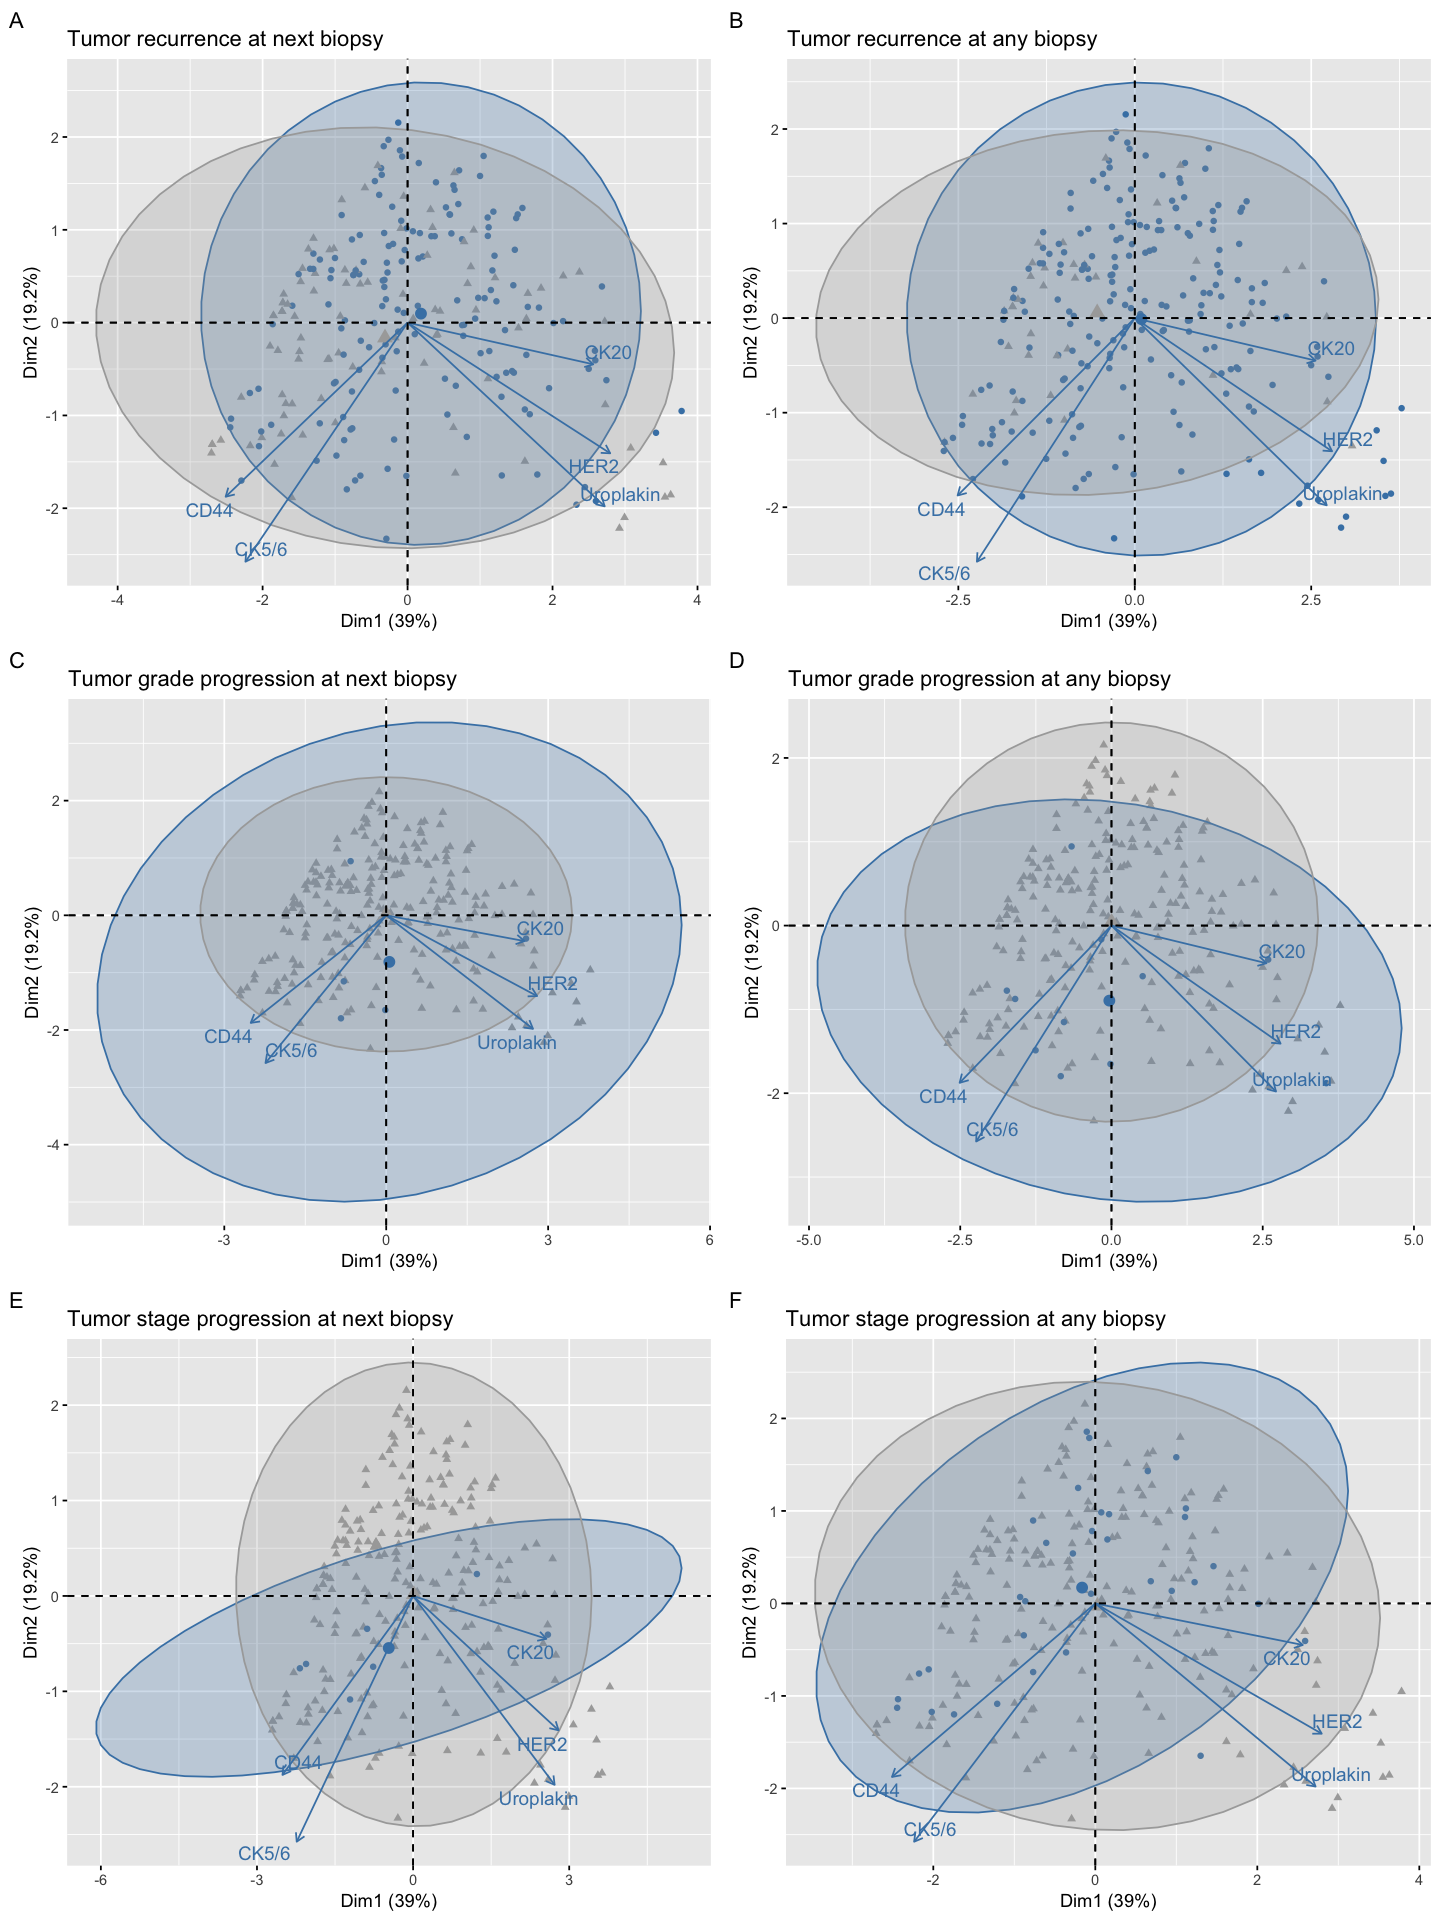

In [73]:
options(repr.plot.width = 12, repr.plot.height = 16)

Plot_PCA <- gridExtra::grid.arrange(
  PCA_A, PCA_B, PCA_C, PCA_D, PCA_E, PCA_F, 
  ncol = 2
)

In [74]:
ggsave(
  filename = "Figs/BL-NMIBUC-PCA.png",
  plot = Plot_PCA,
  width = 12,
  height = 16,
  units = "in"
)